In [1]:
#For classification:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

#For Regression:-

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 1-Classification -->Target='region'

In [2]:
df=pd.read_csv('avocado.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(1517, 14)

# Checking the dataset attributes

In [5]:
df['Unnamed: 0'].value_counts()

38    40
37    40
36    39
40    38
39    38
33    38
35    38
34    37
41    37
43    36
42    36
44    35
32    34
45    34
31    33
46    33
29    33
30    32
28    31
47    30
6     28
27    28
2     28
5     28
1     28
4     28
3     28
0     27
48    27
7     27
8     26
25    26
49    26
26    26
20    25
19    24
10    24
50    24
24    24
21    24
18    24
9     24
11    24
12    24
17    24
13    23
22    23
23    23
14    23
16    23
51    23
15    21
Name: Unnamed: 0, dtype: int64

In [6]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [7]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [8]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

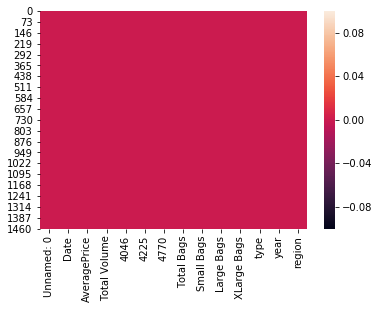

In [10]:
sns.heatmap(df.isnull())  

In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EDA

# Univariate analysis

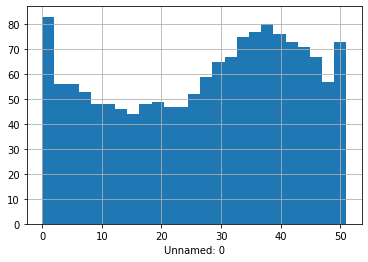

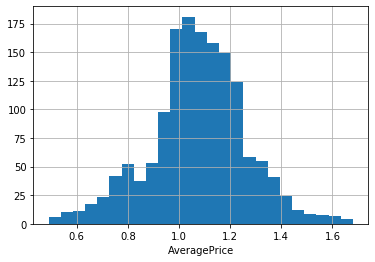

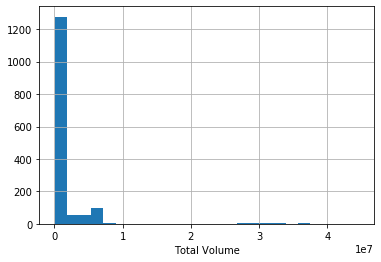

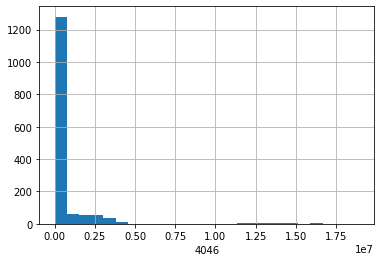

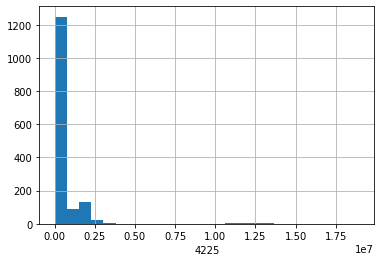

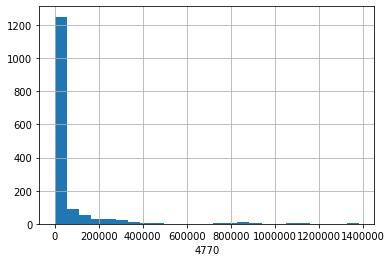

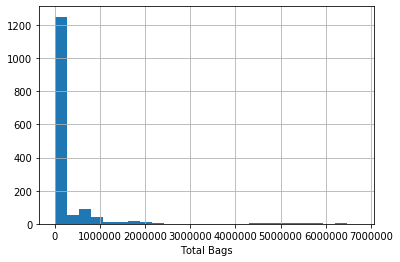

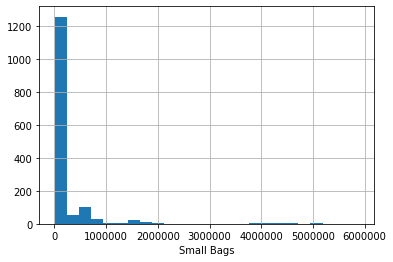

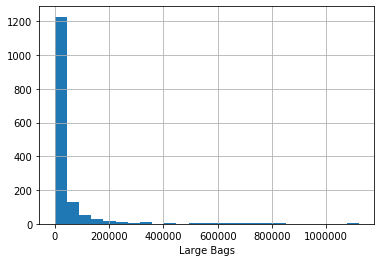

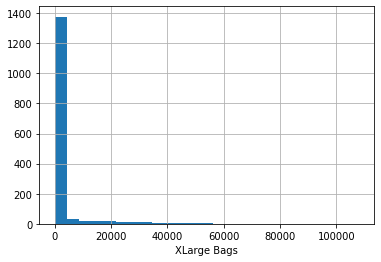

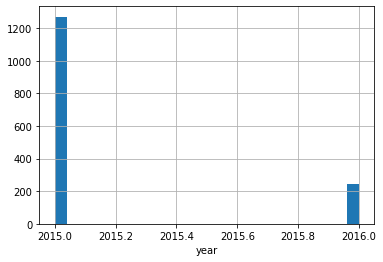

In [12]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

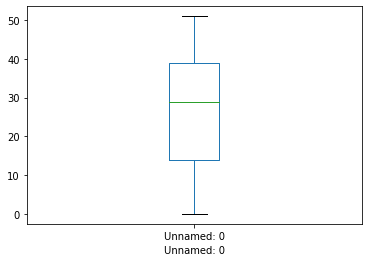

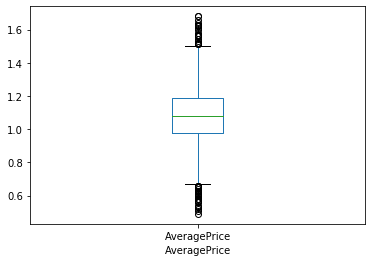

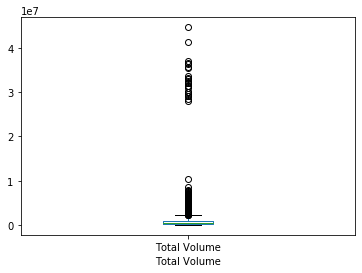

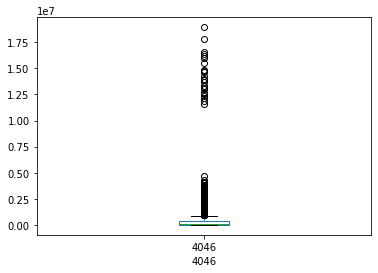

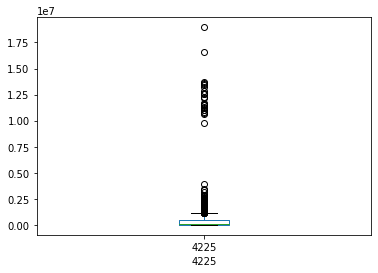

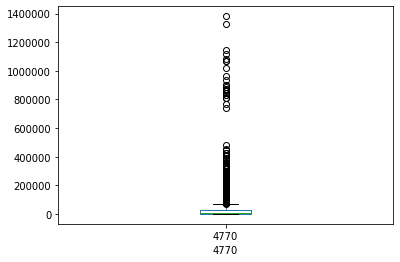

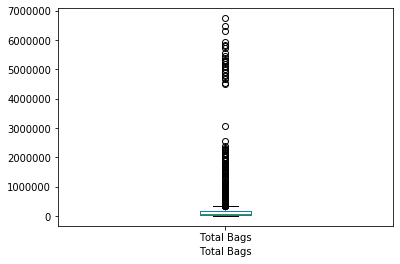

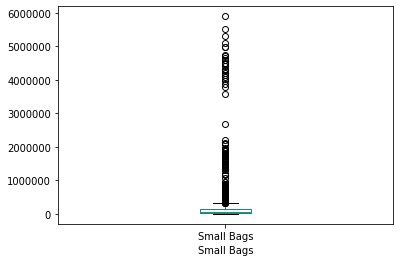

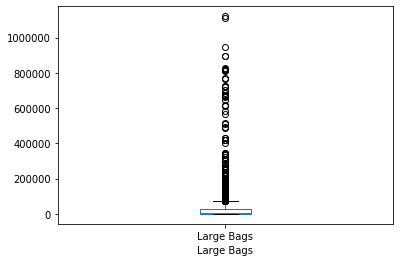

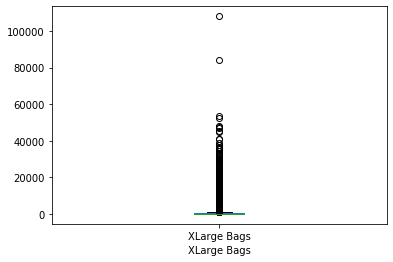

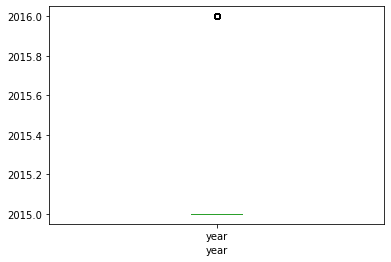

In [13]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Bivariate analysis

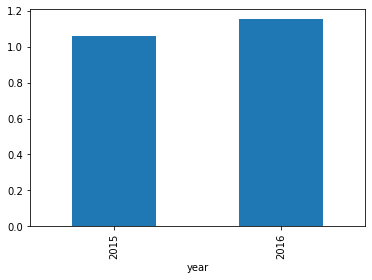

In [14]:
df.groupby(['year'])['AveragePrice'].mean().plot.bar()
#AveragePrice per avocado in year 2016 was higher as compared to 2015

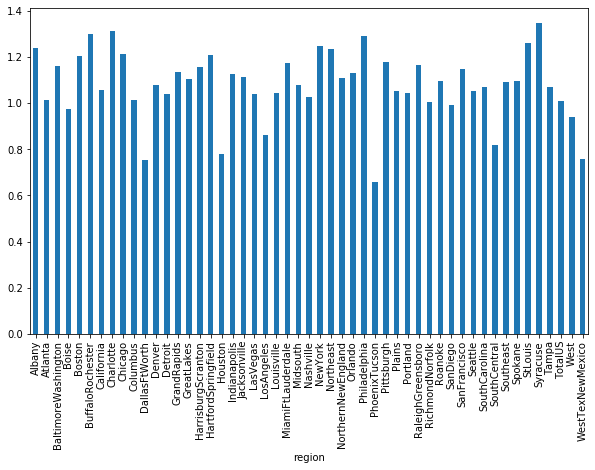

In [15]:
plt.figure(figsize=(10,6))
df.groupby('region')['AveragePrice'].mean().plot.bar()
#region wise averageprice of avocado

# Feature Engineering

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [17]:
df['type']=le.fit_transform(df['type'])

In [18]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


# Changing object type to date format

In [19]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [20]:
new_df=pd.DataFrame({'Year':df['Date'].dt.year,
                     'month':df['Date'].dt.month,
                     'day':df['Date'].dt.day,
                     'week':df['Date'].dt.week,           
                    'quater':df['Date'].dt.quarter})

In [21]:
df=pd.concat([df,new_df],axis=1)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,month,day,week,quater
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2015,12,27,52,4
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2015,12,20,51,4
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2015,12,13,50,4
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2015,12,6,49,4
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,2015,11,29,48,4


# Changing column name

In [22]:
df['New']=df['Unnamed: 0']
#for convinience we are changing the name of column,later we will drop the original column.

In [23]:
#checking correlation between columns before dropping them.
df.corr()
#type column has no correlation with either AveragePrice nor region
#none of the negatively correlated columns with the target have very high values.

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,month,day,week,quater,New
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123,-0.012854,-0.996397,-0.118390,-0.979439,-0.968351,1.000000
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408,0.178683,0.066859,0.092531,0.066456,0.077353,-0.075531
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579,-0.004189,-0.090520,-0.022423,-0.090982,-0.090527,0.091934
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481,-0.040439,-0.090647,-0.018394,-0.091876,-0.089847,0.092013
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733,-0.007254,-0.091329,-0.032709,-0.091946,-0.091595,0.093566
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092,0.029222,-0.074855,-0.014611,-0.075271,-0.075665,0.075647
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001,0.090108,-0.081330,-0.009035,-0.079436,-0.082691,0.081007
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650,0.106382,-0.084376,-0.003583,-0.082154,-0.085811,0.083485
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452,-0.018678,-0.062447,-0.038890,-0.062228,-0.062632,0.065364
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144,0.218342,0.049232,0.009174,0.045422,0.038505,-0.050993


# Dropping Date column

In [24]:
df=df.drop(['Date','Unnamed: 0','type'],axis=1)#we have extracted data from date column,hence no use of the column.
                                            #we made a new column 'new' and changed the name
                                            #All the values were same

# Skewness treatment

In [25]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Year            1.828332
month           0.233418
day             0.027740
week            0.231391
quater          0.195856
New            -0.234824
dtype: float64

# Saving the cleaned data for Regression

In [26]:
df.to_csv('E:\\cleanedavocado.csv')

# Separating target and independent variables

In [27]:
y=df['region']
X=df.drop(['region'],axis=1)

# Applying Power transformation to remove skewness

In [28]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [29]:
df.skew()

AveragePrice    0.021101
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
Year            0.000000
month          -0.098339
day            -0.210460
week           -0.152597
quater         -0.043465
New            -0.348219
dtype: float64

In [30]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,month,day,week,quater,New
0,1.367329,0.0,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0.0,0.0,1.537540,1.245043,1.588149,1.352121,-1.953012
1,1.478422,0.0,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0.0,0.0,1.537540,0.563314,1.541058,1.352121,-1.855811
2,-0.776831,0.0,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0.0,0.0,1.537540,-0.187225,1.493577,1.352121,-1.765244
3,0.009427,0.0,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0.0,0.0,1.537540,-1.058082,1.445696,1.352121,-1.678732
4,1.091160,0.0,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0.0,0.0,1.322684,1.430554,1.397403,1.352121,-1.595115


# Scaling the data

In [31]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


# Model building

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [34]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [35]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.3078947368421053


cross_val_score  - 0.302496500493565


classification report
               precision    recall  f1-score   support

           0       0.11      0.41      0.18        17
           1       0.05      0.21      0.08        14
           2       0.22      0.38      0.28        16
           3       0.36      0.62      0.45        16
           4       0.18      0.25      0.21        16
           5       0.38      0.23      0.29        13
           6       0.86      1.00      0.93        19
           7       0.17      0.12      0.14         8
           8       0.67      0.33      0.44         6
           9       0.00      0.00      0.00        12
          10       0.11      0.25      0.15         4


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** DecisionTreeClassifier *******************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy_score  - 0.8894736842105263


cross_val_score  - 0.8551144190448682


classification report
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.90      0.64      0.75        14
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        16
           5       0.92      0.92      0.92        13
      

AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** XGBClassifier *******************


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


Accuracy_score  - 0.9368421052631579


cross_val_score  - 0.9149262003818606


classification report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00        14
          

cross_val_score  - 0.08787114270288061


classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        14
           2       0.07      1.00      0.12        16
           3       0.00      0.00      0.00        16
           4       0.18      0.94      0.30        16
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16     

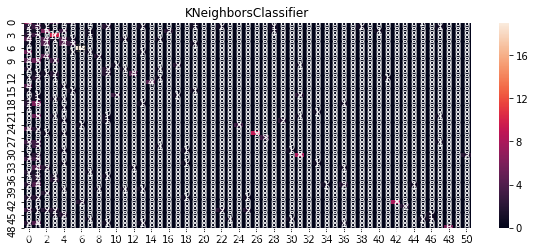

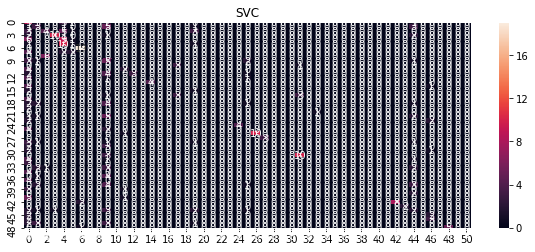

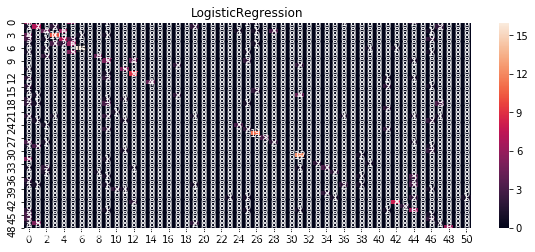

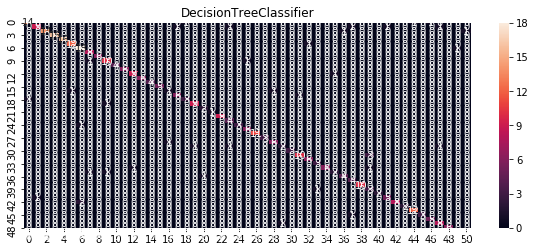

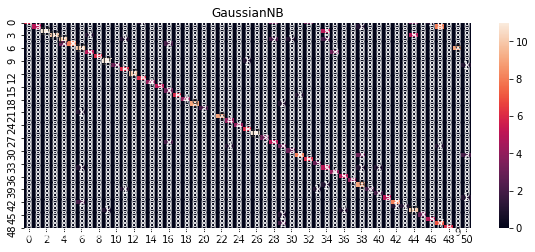

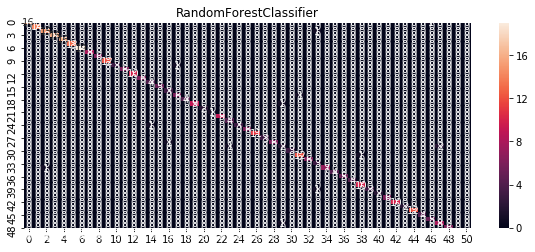

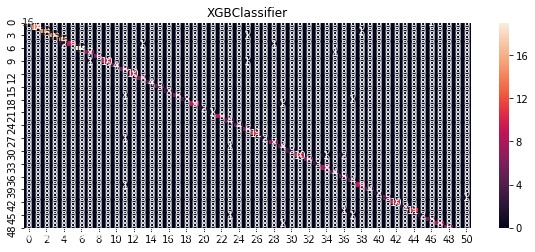

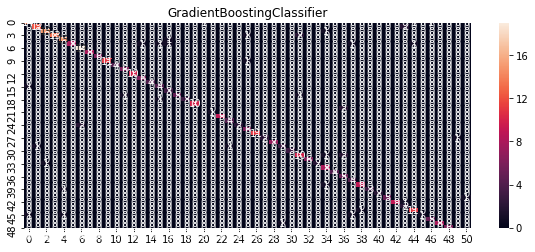

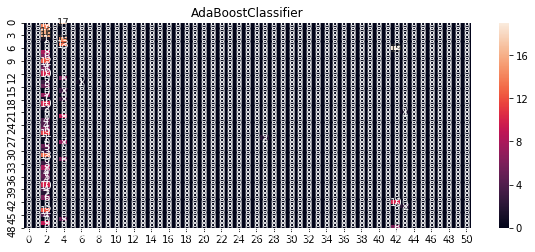

In [37]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    
    
    
    
    
    

In [38]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,30.789474,30.249650
1,SVC,34.473684,34.802539
2,LogisticRegression,42.105263,42.570118
3,DecisionTreeClassifier,88.947368,85.511442
4,GaussianNB,78.157895,79.748323
5,RandomForestClassifier,96.315789,95.556822
6,XGBClassifier,93.684211,91.492620
7,GradientBoostingClassifier,89.210526,88.287064
8,AdaBoostClassifier,13.421053,8.787114


In [39]:
#hence RandomForestClassifier is the best performing Algorithm .

# Finding the best random_state for all models

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [41]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   47   which is   0.33157894736842103
knn 47
max_accuracy_score is at random_state   47   which is   0.3868421052631579
svc 47
max_accuracy_score is at random_state   61   which is   0.46578947368421053
lr 61
max_accuracy_score is at random_state   95   which is   0.9263157894736842
dt 95
max_accuracy_score is at random_state   45   which is   0.8447368421052631
gnb 45
max_accuracy_score is at random_state   63   which is   0.9763157894736842
rfc 63
max_accuracy_score is at random_state   60   which is   0.9578947368421052
xgb 60
max_accuracy_score is at random_state   86   which is   0.9315789473684211
gbc 86
max_accuracy_score is at random_state   76   which is   0.16052631578947368
ada 76


In [42]:
#We can see RandomForestClassifier is performing the best at random state=45
#Moreover RandomForestClassifier has very less chance of overfitting and underfitting.
#We reached our target of 90% accuracy.
#So i am not trying the gridsearchcv to increase the score. 

# saving the RandomForestClassifier model

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,stratify=y)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy_score=  ',accuracy_score(y_test,pred))


Accuracy_score=   0.9710526315789474


In [44]:
from sklearn.externals import joblib
joblib.dump(rfc,'project3-avocadoclassification.obj')

['project3-avocadoclassification.obj']

In [45]:
model=joblib.load('project3-avocadoclassification.obj')

In [46]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['region'])
final_predictions.head()

,region
0,46
1,26
2,1
3,6
4,4


# Saving final predictions in file.csv 

In [47]:
final_predictions.to_csv('E:\\final_predictionsavocadoclf.csv',index=False)

# Conclusion:-

# 2-Regression -->target=AveragePrice

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

In [49]:
df=pd.read_csv('E:\\cleanedavocado.csv')
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Year,month,day,week,quater,New
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,2015,12,27,52,4,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,2015,12,20,51,4,1
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,2015,12,13,50,4,2
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,2015,12,6,49,4,3
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,2015,11,29,48,4,4


In [50]:
df.shape

(1517, 18)

# Separating training and testing dataset

In [51]:
y=df['AveragePrice']
x=df.drop(['AveragePrice'],axis=1)

# Removing skewness

In [52]:
x.skew()

Unnamed: 0      0.000000
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Year            1.828332
month           0.233418
day             0.027740
week            0.231391
quater          0.195856
New            -0.234824
dtype: float64

In [53]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [54]:
x.skew()

Unnamed: 0     -0.289294
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region         -0.209568
Year            0.000000
month          -0.098339
day            -0.210460
week           -0.152597
quater         -0.043465
New            -0.348219
dtype: float64

# Scaling the data

In [55]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=x.columns)


# Model Building

In [56]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [57]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [59]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.6832957853357837


cross_val_score  - -0.010703211111050659


rmse_score  - 0.10440452702425262


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.7307128669750758


cross_val_score  - 0.3425391883910188


rmse_score  - 0.09627204787043307


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.29327079623570973


cross_val_score  - -0.44966028610266984


rmse_score  - 0.15596204736623043


***************** DecisionTreeRegressor *******************


DecisionTreeRe

In [60]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,68.329579,0.104405,-1.070321
1,SVR,73.071287,0.096272,34.253919
2,LinearRegression,29.327080,0.155962,-44.966029
3,DecisionTreeRegressor,68.557550,0.104028,-39.005631
4,GradientBoostingRegressor,78.637594,0.085747,27.503499
5,AdaBoostRegressor,62.820152,0.113122,28.303365
6,RandomForestRegressor,83.030298,0.076424,19.818237
7,XGBRegressor,86.322055,0.068612,-1.810011


In [61]:
#hence XGBRegressor is the best performing Algorithm for the taken dataset.
#But our target score is 90%
#to achieve 90% score we will apply Gridsearchcv technique to the top3 performing models.

In [62]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [63]:
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [64]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   59   which is   0.7642466344347805
knn 59
max_r2_score is at random_state   47   which is   0.7894500621030214
SVR 47
max_r2_score is at random_state   89   which is   0.403750929997577
lr 89
max_r2_score is at random_state   57   which is   0.7898262081621577
dt 57
max_r2_score is at random_state   68   which is   0.8045923080393027
gbm 68
max_r2_score is at random_state   43   which is   0.8591015140877689
rfr 43
max_r2_score is at random_state   74   which is   0.8737854945737785
xgb 74
max_r2_score is at random_state   51   which is   0.68348593246905
ada 51


# GridSearchCV

# model1->RandomForestRegressor(random_state=43)-score=83.68

In [65]:
RandomForestRegressor(random_state=43)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=43, verbose=0,
                      warm_start=False)

In [66]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=500)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)

R2_score=   0.8540172746109698


In [68]:
#we can see our score has improved and greater than previous model of RandomForestRegressor

# model2->GradientBoostingRegressor(random_state=60)-score=79.19

In [69]:
gbm=GradientBoostingRegressor(random_state=60)

In [70]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'learning_rate':[0.1,0.05,0.001], 'n_estimators':[50,100]}]
            
grid_search=GridSearchCV(gbm,parameters,n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_leaf=1,n_estimators=100)
gbm.fit(x_train,y_train)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.853479301063287
RMSE score=  0.07256519449769205


In [72]:
#we can see our score has improved but not greater than previous RandomForestRegressor model

# model3->DecisionTreeRegressor(random_state=57)-score=76.74

In [73]:
dt=DecisionTreeRegressor(random_state=57)

In [74]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
            
grid_search=GridSearchCV(dt,parameters,n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 2}

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57)
dt=DecisionTreeRegressor(max_depth=7,min_samples_leaf=2)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
score=r2_score(y_test,pred_dt)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_dt)))

R2_score=   0.6756903464500537
RMSE score=  0.11362257177995173


In [76]:
#we can see the score has dropped.

# Saving the final RandomForestRegressor model

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=500)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
rmse=np.sqrt(mean_squared_error(y_test,pred_rfr))
print('R2_score=  ',score)
print('RMSE score',rmse)

R2_score=   0.8569741839562657
RMSE score 0.07665033723082375


In [78]:
from sklearn.externals import joblib
joblib.dump(rfr,'Project-3-avocadoregression.obj')

['Project-3-avocadoregression.obj']

In [79]:
model=joblib.load('Project-3-avocadoregression.obj')

In [80]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['AveragePrice'])
final_predictions.head()

,AveragePrice
0,1.073695
1,0.773748
2,0.868977
3,1.156342
4,1.066408


# Saving final predictions in file.csv 

In [81]:
final_predictions.to_csv('E:\\final_predictionsavocadoreg.csv',index=False)

# Conclusion:-